In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save file paths to variables "mouse_path" and "clinical_trial_path", respectively
mouse_path = "data/mouse_drug_data.csv"
clinical_trial_path = "data/clinicaltrial_data.csv"

In [3]:
# Read "Mouse and Drug" and "Clinical Trial" data and save to "mouse_data" and "clinical_trial_data", respectively
mouse_data = pd.read_csv(mouse_path)
clinical_trial_data = pd.read_csv(clinical_trial_path)

In [4]:
# Preview "mouse_data"
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Preview "clinical_trial_data"
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine two DataFrame and save as "merged_ori_data"
combined_df = pd.merge(clinical_trial_data, mouse_data, on="Mouse ID", how="left")

# Preview "merged_ori_data"
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [7]:
# Check if missing value existing
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


## Tumor Response to Treatment

In [8]:

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
tumor_vol_avg = tumor_vol.mean()



In [9]:
# Convert "tumor_vol_avg" to DataFrame
tumor_vol_avg = tumor_vol_avg.reset_index()

# Preview "tumor_vol_avg"
tumor_vol_avg.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Pivot "tumor_vol_avg" to re-format the DataFrame and save as "pivot_tumor_vol_avg"
pivot_tumor_vol_avg = tumor_vol_avg.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview "pivot_tumor_vol_avg"
pivot_tumor_vol_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [11]:

# Calculate the standard error (se) of "Tumor Volume" upon each drug treatment in "tumor_vol" and save as "tumor_vol_se"
tumor_vol_se = tumor_vol.sem()



In [12]:
# Convert "tumor_vol_se" to DataFrame
tumor_vol_se = tumor_vol_se.reset_index()

# Preview "tumor_vol_se"
tumor_vol_se.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
# Pivot "tumor_vol_se" to re-format the DataFrame and save as "pivot_tumor_vol_se"
pivot_tumor_vol_se = tumor_vol_se.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview "pivot_tumor_vol_se"
pivot_tumor_vol_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [14]:
# Create three lists to store info. of "names", "formats (fmts)", as well as "colors" for plot generation
names = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fmts = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]

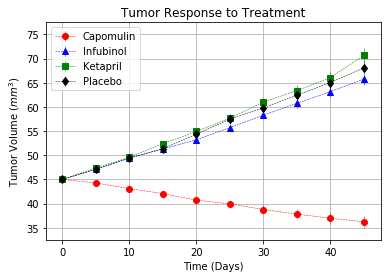

In [15]:
# Use "For" statement to generate the plot of "Tumor Response to Treatment" in a fancy (lazy) way
for drug, fmt, color in zip(names, fmts, colors):
    tumor_plt = plt.errorbar(pivot_tumor_vol_avg.index, pivot_tumor_vol_avg[drug], pivot_tumor_vol_se[drug], linewidth=0.5, linestyle="--", fmt=fmt, color=color)
    
# Create title
plt.title("Tumor Response to Treatment")

# Create labels for x and y axes
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume " + "$(mm^3)$")

# Create legend
plt.legend()

# Set limits on x and y axes
plt.xlim(-2.5, 47.5)
plt.ylim(32.5, 77.5)

# Create grid
plt.grid()

# Save figure
plt.savefig("image/Tumor Response to Treatment.png", dpi=300)

# Show figure
plt.show()

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_sites = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
meta_sites_avg = meta_sites.mean()

# Convert "metastatic_ct_avg" to DataFrame
meta_sites_avg = pd.DataFrame(meta_sites_avg )

# Preview "metastatic_ct_avg"
meta_sites_avg.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Pivot "metastatic_ct_avg" to re-format the DataFrame and save as "pivot_metastatic_ct_avg"
meta_sites_avg= meta_sites_avg.reset_index()
pivot_meta_sites_avg = meta_sites_avg.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview "pivot_metastatic_ct_avg"
pivot_meta_sites_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [18]:
# Calculate the standard error of "Metastatic Sites" upon each drug treatment in "metastatic_ct" and save as "metastatic_ct_se"
meta_sites_se = meta_sites.sem()



In [19]:
# Convert "metastatic_ct_se" to DataFrame
meta_sites_se = meta_sites_se.reset_index()

# Preview "metastatic_ct_se"
meta_sites_se.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [20]:
# Pivot "metastatic_ct_se" to re-format the DataFrame and save as "pivot_metastatic_ct_se"
pivot_meta_sites_se = meta_sites_se.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview "pivot_metastatic_ct_se"
pivot_meta_sites_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


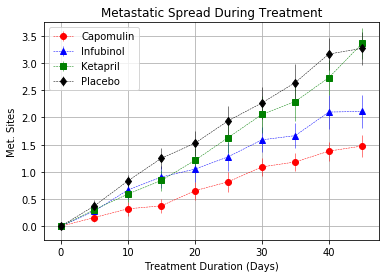

In [21]:
# Use "For" statement to generate the plot of "Metastatic Response to Treatment"
for drug, fmt, color in zip(names, fmts, colors):
    metastasis_plt = plt.errorbar(pivot_meta_sites_avg.index, pivot_meta_sites_avg[drug], pivot_meta_sites_se[drug], linewidth=0.5, linestyle="--", fmt=fmt, color=color)
    
# Create title
plt.title("Metastatic Spread During Treatment")

# Create labels for x and y axes
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Create legend
plt.legend()

# Set limits on x and y axes
plt.xlim(-2.5, 47.5)
plt.ylim(-0.25, 3.75)

# Create grid
plt.grid()

# Save figure
plt.savefig("image/Metastatic Response to Treatment.png", dpi=300)

# Show figure
plt.show()

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count=combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert "survival_count" to DataFrame
survival_count = survival_count.reset_index()

# Preview "survival_count"
survival_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [23]:
# Pivot "survival_count" to re-format the DataFrame and save as "pivot_survival_count"
pivot_survival_count = survival_count.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview "pivot_mouse_ct"
pivot_survival_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [24]:
# Calculate mouse survival rates and store the date in a dataframe"pivot_survival_pct"
pivot_survival_pct =  pivot_survival_count
col = list(pivot_survival_count.columns)
for i in range(len(col)):
    pivot_survival_pct[col[i]] = pivot_survival_pct[col[i]]*100/pivot_survival_pct.iloc[0,i]
pivot_survival_pct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


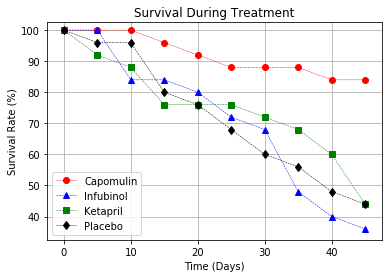

In [25]:
# Generate the plot of "Survival Rates"
# Create x axis
x_axis = pivot_survival_pct.index

# Take mouse survival percentage from pivot_survival_pct_df
y_pct_axis1 = pivot_survival_pct['Capomulin']
y_pct_axis2 = pivot_survival_pct['Infubinol']
y_pct_axis3 = pivot_survival_pct['Ketapril']
y_pct_axis4 = pivot_survival_pct['Placebo']


# Generate the plot
plt.plot(x_axis, y_pct_axis1, label='Capomulin',color='red',marker= "o", linestyle="--", linewidth=0.5);
plt.plot(x_axis, y_pct_axis2,label='Infubinol', color='blue', marker= "^", linestyle="--",linewidth=0.5);
plt.plot(x_axis, y_pct_axis3,label='Ketapril',color='green',  marker="s", linestyle="--", linewidth=0.5);
plt.plot(x_axis, y_pct_axis4,label='Placebo',color='black',  marker= "d", linestyle="--",linewidth=0.5);
    
# Create title
plt.title("Survival During Treatment")

# Create lables for x and y axes
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Create legend
plt.legend()

# Set limits on x and y axes
plt.xlim(-2.5, 47.5)
plt.ylim(32.5, 102.5)

# Create grid
plt.grid()

# Save figure
plt.savefig("image/Survival Rates.png", dpi=300)

# Show figure
plt.show()

## Summary Bar Graph

In [26]:
# Calculate the total % tumor volume change upon each drug treatment in "pivot_tumor_vol_avg" and save as "tumor_vol_total_pct"
tumor_vol_total_pct = (pivot_tumor_vol_avg.iloc[-1] / pivot_tumor_vol_avg.iloc[0] - 1) * 100

# Preview "total_vol_total_pct" to confirm
tumor_vol_total_pct

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [27]:
# Store all Relevant Percent Changes into a Tuple
tumor_change_pct_tuple = tuple([i for i in tumor_vol_total_pct.values])

tumor_change_pct_tuple

(-19.47530266789417,
 42.51649185589741,
 46.12347172785185,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320634,
 -22.32090046276667,
 52.08513428789896,
 46.57975086509525)

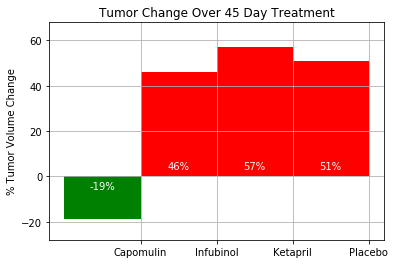

In [28]:

# Create tick marks
xtick_name=['Capomulin','Infubinol','Ketapril','Placebo']

# Set x axis and bar height
xaxis = [1,2,3,4] 
height = [int(tumor_vol_total_pct[x]) for x in xtick_name]

# Bar color
colors = ['r' if x >0 else 'g' for x in height]

# Set The position to place the text and the text we need to add
text_xloc=[x-0.5 for x in xaxis]
text_yloc=[2.5 if x >0 else (-6.5) for x in height]
text=[f'{x}%' for x in height]

# Generate the bar chart
plt.bar(xaxis, height, width=-1, color=colors, align='edge')

# Generate the label for y axis and tick, title
plt.xticks(xaxis,xtick_name)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


# Use functions to label the percentages of changes

for i in range(len(text)):
    plt.text(text_xloc[i],text_yloc[i],text[i],ha="center", va="bottom", color = "w")

    
# Set limits on x and y axes
plt.xlim(-0.2, 4.2)
plt.ylim(-28, 68)

# Set grid
plt.grid()

# Save the Figure
plt.savefig("image\Summary Bar Graph.png", dpi=300)

# Show the Figure
plt.show()